In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import tree

In [ ]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.quality.replace([3, 4, 5, 6, 7, 8], [0, 0, 0, 1, 1, 1], inplace=True)
df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


In [ ]:
# Encoding categorical variable
df['quality_cat'] = df['quality'].astype('category').cat.codes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


Text(0.5, 1.0, 'Quality')

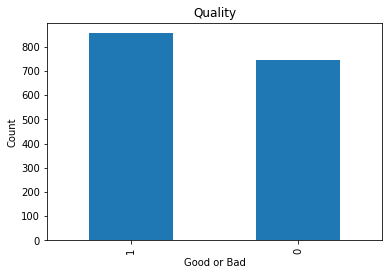

In [ ]:
df.quality.value_counts().plot(kind='bar')
plt.xlabel("Good or Bad")
plt.ylabel("Count")
plt.title("Quality")
#Here we can see that dataset is not much imbalanced so there is no need to balance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfa07bdad0>,
      dtype=object)

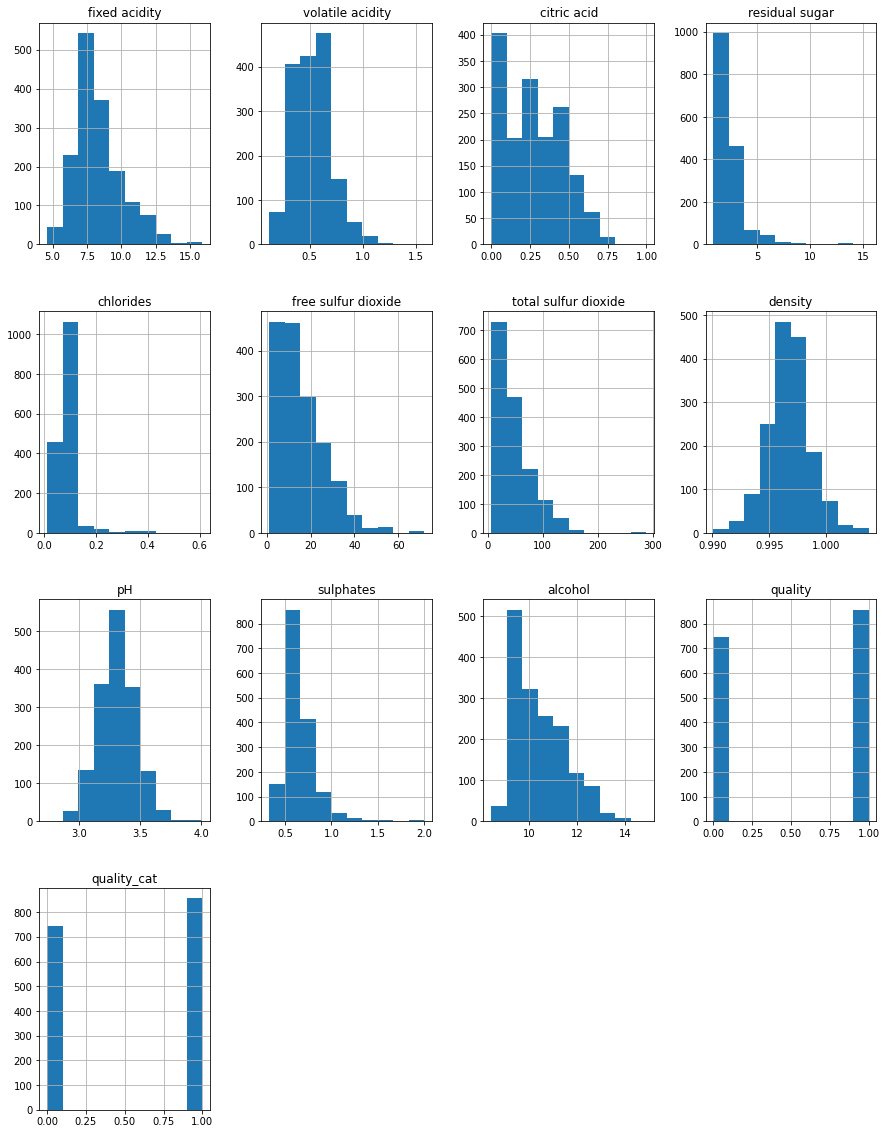

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [ ]:
df1 = df.drop('quality',axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_cat           1599 non-null   int8   
dtypes: float64(11), int8(1)
memory usage: 139.1 KB


In [ ]:
X = df1.drop('quality_cat',axis=1)
Y = df1['quality_cat']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.30, random_state= 8)

In [ ]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_train)
acc_train = accuracy_score(y_train, y_pred) # calculate the training accuracy
lr.score(X_test,y_test)
y_pred_val = lr.predict(X_val) # predict the labels of validation set
acc_val = accuracy_score(y_val, y_pred_val) # calculate the validation accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print(acc_val)

0.5546875


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_pred_test = lr.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.753125

In [ ]:
THRESHOLD = 0.5
y_pred = np.where(y_pred>0.5,1,0)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

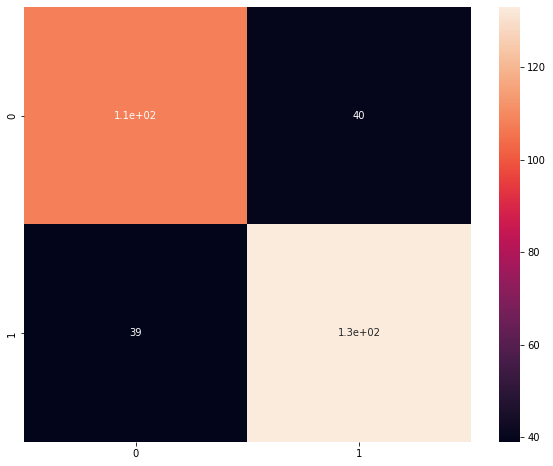

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Bad', 'Good']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.73      0.73      0.73       148
        Good       0.77      0.77      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [ ]:
lr = 0.06

# Parameters initialization
weights = np.random.normal(0, 0.1, 11)
biais = random.normalvariate(0, 0.1)

m = X_train.shape[0]
for epoch in range(1000):

    # Forward pass
    Z = np.dot(X_train, weights) + biais
    A = 1 / (1 + np.exp(-Z))
    
    #Loss Computation
    J = np.sum(-(y_train * np.log(A) + (1 - y_train) * np.log(1 - A))) / m

    # Gradient computation
    dZ = A - y_train
    dw = np.dot(dZ, X_train) / m
    db = np.sum(dZ) / m

    # Update weights
    weights = weights - lr * dw
    biais = biais - lr * db
    
    if epoch % 10 == 0:
        print("epoch %s - loss %s" % (epoch, J))

epoch 0 - loss 0.7049599927361414
epoch 10 - loss 0.6419810380638796
epoch 20 - loss 0.6055547641267315
epoch 30 - loss 0.5830607995674596
epoch 40 - loss 0.5682264632127273
epoch 50 - loss 0.5578975318508099
epoch 60 - loss 0.550392050914129
epoch 70 - loss 0.544751874933374
epoch 80 - loss 0.5403976506766736
epoch 90 - loss 0.5369610642364155
epoch 100 - loss 0.5341981020070423
epoch 110 - loss 0.5319415016020868
epoch 120 - loss 0.5300733027800576
epoch 130 - loss 0.5285082825138245
epoch 140 - loss 0.5271835743203404
epoch 150 - loss 0.5260519511568301
epoch 160 - loss 0.5250773579490277
epoch 170 - loss 0.5242318688633579
epoch 180 - loss 0.5234935713552019
epoch 190 - loss 0.5228450673087895
epoch 200 - loss 0.5222723936086477
epoch 210 - loss 0.521764233067333
epoch 220 - loss 0.5213113296953715
epoch 230 - loss 0.5209060499459089
epoch 240 - loss 0.5205420496736907
epoch 250 - loss 0.5202140186214609
epoch 260 - loss 0.5199174824287575
epoch 270 - loss 0.51964864778528
epoch 28

In [ ]:
preds = []
for feats in X_test:

    z = np.dot(feats, weights) + biais
    a = 1 / (1 + np.exp(-z))

    if a > 0.5:
        preds.append(1)
    elif a <= 0.5:
        preds.append(0)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Bad', 'Good']
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.73      0.73      0.73       148
        Good       0.77      0.77      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



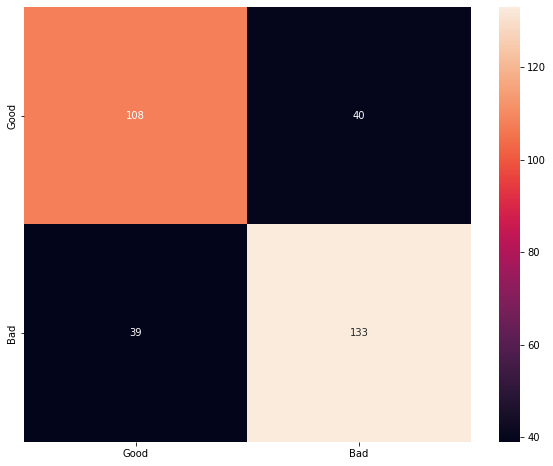

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(mat,xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'], fmt='.0f',annot=True)

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, preds)
print('F1 score: %f' % f1)
from sklearn.metrics import precision_score, recall_score
print('Precision is: ', precision_score(y_test, preds))
print('Recall is: ', recall_score(y_test, preds))

F1 score: 0.771014
Precision is:  0.7687861271676301
Recall is:  0.7732558139534884


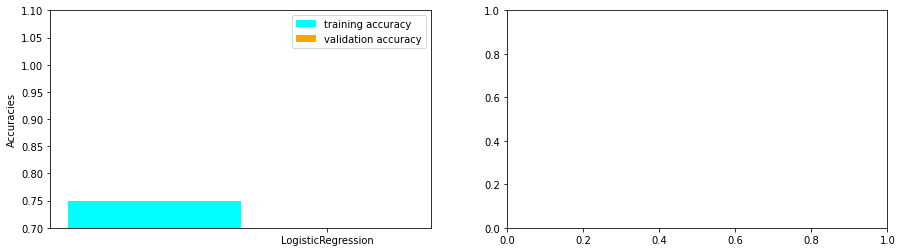

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
x = np.arange(1)
y1 = acc_train
y2 = acc_val
width = 0.2

axes[0].bar(x-0.2, y1, width, color='cyan')
axes[0].bar(x, y2, width, color='orange')
axes[0].set_ylim(0.7, 1.1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["LogisticRegression"])
axes[0].set_ylabel("Accuracies")
axes[0].legend(["training accuracy", "validation accuracy"])

X_fit = np.linspace(-22, 22, 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=0.3)
dt_basic = DecisionTreeClassifier(max_depth=10)
# Fit the training data
dt_basic.fit(x_train,y_train)
# Predict based on test data
y_preds = dt_basic.predict(x_val)
accuracy_value = metrics.accuracy_score(y_val,y_preds)
accuracy_value

0.7416666666666667

In [ ]:
confusion_matrix(y_val,y_preds)

array([[146,  53],
       [ 71, 210]])

In [ ]:
print(classification_report(y_val,y_preds))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       199
           1       0.80      0.75      0.77       281

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.75      0.74      0.74       480



[Text(0.5883394012944984, 0.9545454545454546, 'X[10] <= 10.017\ngini = 0.497\nsamples = 1119\nvalue = [516, 603]'),
 Text(0.345873786407767, 0.8636363636363636, 'X[9] <= 0.695\ngini = 0.434\nsamples = 530\nvalue = [361, 169]'),
 Text(0.23786407766990292, 0.7727272727272727, 'X[6] <= 99.5\ngini = 0.382\nsamples = 408\nvalue = [303, 105]'),
 Text(0.1488673139158576, 0.6818181818181818, 'X[9] <= 0.525\ngini = 0.415\nsamples = 347\nvalue = [245, 102]'),
 Text(0.09627831715210355, 0.5909090909090909, 'X[4] <= 0.08\ngini = 0.269\nsamples = 106\nvalue = [89, 17]'),
 Text(0.06957928802588997, 0.5, 'X[10] <= 9.65\ngini = 0.406\nsamples = 53\nvalue = [38, 15]'),
 Text(0.042071197411003236, 0.4090909090909091, 'X[6] <= 78.0\ngini = 0.284\nsamples = 35\nvalue = [29, 6]'),
 Text(0.025889967637540454, 0.3181818181818182, 'X[1] <= 0.415\ngini = 0.219\nsamples = 32\nvalue = [28, 4]'),
 Text(0.012944983818770227, 0.22727272727272727, 'X[9] <= 0.485\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.00

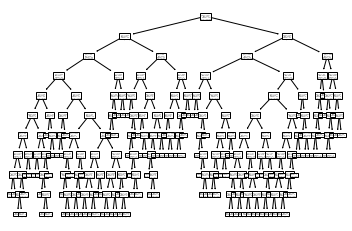

In [ ]:
tree.plot_tree(dt_basic)

In [ ]:
y_pred_train = dt_basic.predict(x_train)
tr_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: ", tr_accuracy)

Training Accuracy:  0.9249329758713136


In [ ]:
# Create a Parameter grid
param_grid = {
    'max_depth' : range(4,20,4),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5

In [ ]:
grid = GridSearchCV(dt_basic, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)

In [ ]:
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [ ]:
grid.best_score_

0.7167640935297885

In [ ]:
dt_basic_1 = DecisionTreeClassifier(criterion = 'gini', max_depth=10)
# Fit the training data
dt_basic_1.fit(x_train,y_train)
# Predict based on test data
y_preds = dt_basic_1.predict(x_val)
accuracy_value = metrics.accuracy_score(y_val,y_preds)
accuracy_value

0.74375

[Text(0.592863475177305, 0.9545454545454546, 'X[10] <= 10.017\ngini = 0.5\nsamples = 1119\nvalue = [545, 574]'),
 Text(0.39417109929078015, 0.8636363636363636, 'X[0] <= 10.05\ngini = 0.424\nsamples = 544\nvalue = [378, 166]'),
 Text(0.28125, 0.7727272727272727, 'X[1] <= 0.587\ngini = 0.387\nsamples = 480\nvalue = [354, 126]'),
 Text(0.15159574468085107, 0.6818181818181818, 'X[6] <= 59.0\ngini = 0.457\nsamples = 229\nvalue = [148, 81]'),
 Text(0.08156028368794327, 0.5909090909090909, 'X[7] <= 0.997\ngini = 0.496\nsamples = 147\nvalue = [80, 67]'),
 Text(0.031914893617021274, 0.5, 'X[6] <= 15.5\ngini = 0.406\nsamples = 60\nvalue = [43, 17]'),
 Text(0.014184397163120567, 0.4090909090909091, 'X[1] <= 0.475\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.0070921985815602835, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.02127659574468085, 0.3181818181818182, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.04964539007092199, 0.4090909090909091, 'X[8] <= 3.

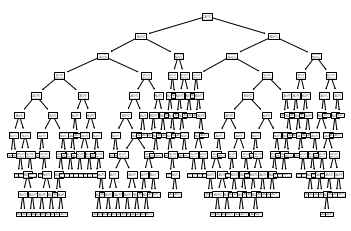

In [ ]:
tree.plot_tree(dt_basic_1)

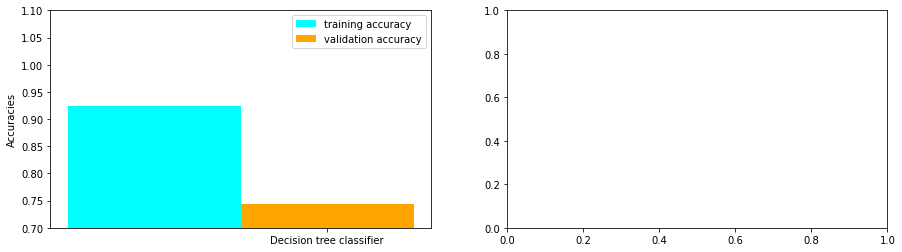

In [ ]:
# plot results
fig, axes = plt.subplots(1,2,figsize=(15,4))
x = np.arange(1)
y1 = tr_accuracy
y2 = accuracy_value
width = 0.2

axes[0].bar(x-0.2, y1, width, color='cyan')
axes[0].bar(x, y2, width, color='orange')
axes[0].set_ylim(0.7, 1.1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["Decision tree classifier"])
axes[0].set_ylabel("Accuracies")
axes[0].legend(["training accuracy", "validation accuracy"])

X_fit = np.linspace(-22, 22, 100)